In [32]:
from sklearn.datasets import load_iris

In [33]:
iris_data = load_iris()

In [34]:
from sklearn.model_selection import train_test_split

X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 11)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

accuracy_score(y_test,pred)

0.9333333333333333

## [ 결정 트리 ]

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

- 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아 배치
    - 해당 속성이 갖는 값을 이용하여 새로운 가치(branch)를 만듬
    - 데이터를 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데, 최대한 균일한 데이터 세트를 구성 할 수 있도록 분할하는것이 필요
    - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택 할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
    
- 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
    - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
    - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현할 수 있는 장점
    - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해지며 과적합으로 정확도가 떨어진다는 단점
    - 모든 데이터 상황을 만족하는 완벽한 규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는것이 요구됨
    - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
    - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임, 서로 다른 값이 섞여 있으면 엔트로피가 높음
      정보 이득 지수 =  1 - 엔트로피(혼잡도)지수 , 정보 이득이 높은 속성을 기준으로 분할
    - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수, 0이 가장 평등하고 1로 갈수록 불평등, 데이터가 다양한 값을 가질수록 평등하며 특정 값 으로 쏠릴 경우에는
      불평등. 다양성이 낮을 수록 균일도가 높다는 의미로서 1로 갈수록 균일도가 높으므로 지니계수가 높은 속성을 기준으로 분할
      
- 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값) , 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
- 파라미터 : min_samples_split,  min_samples_leaf,  max_features,  max_depth,  max_leaf_nodes

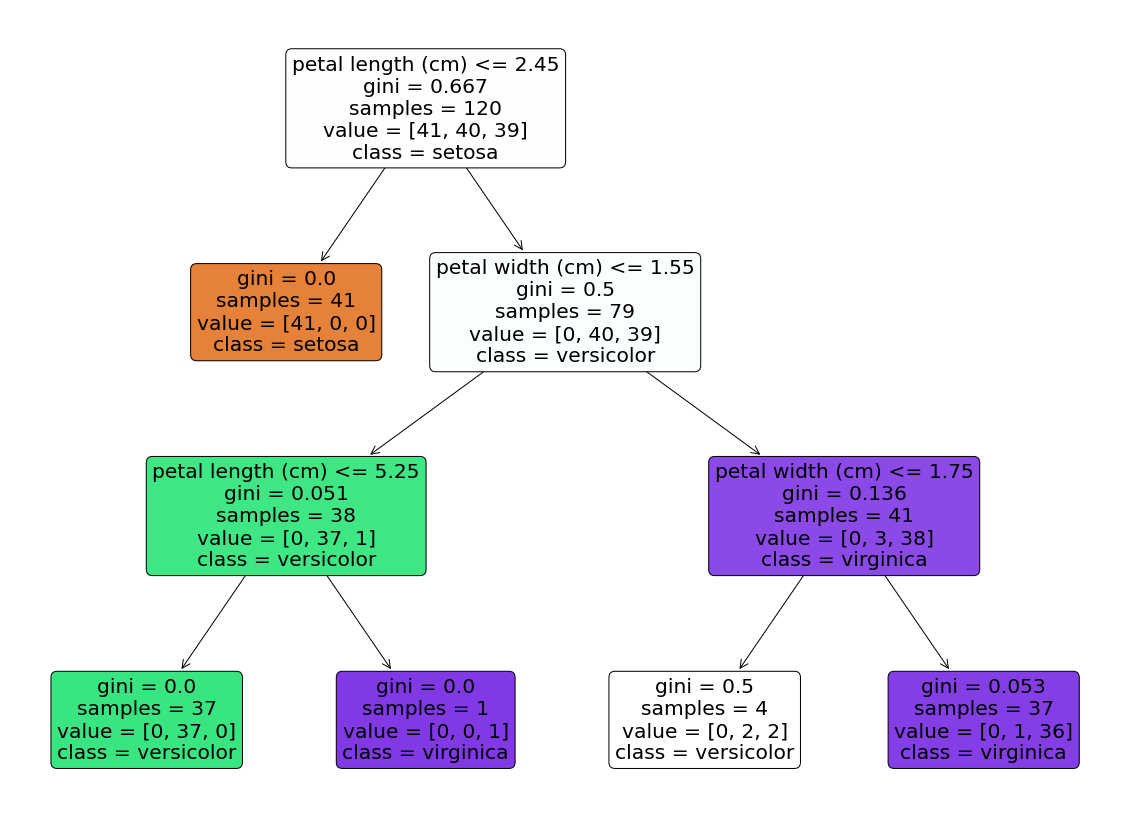

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))

tree.plot_tree(dt, filled=True,
              feature_names = iris_data.feature_names,
              class_names = iris_data.target_names,
              rounded=True)
plt.show()

Feature importance:
[0.    0.    0.558 0.442]

sepal length (cm), 0.000
sepal width (cm), 0.000
petal length (cm), 0.558
petal width (cm), 0.442


<AxesSubplot:>

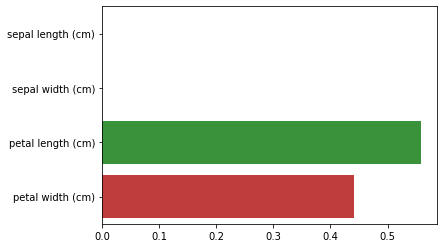

In [46]:
import seaborn as sns
import numpy as np

# feature별 importance추출
print('Feature importance:\n{0}'.format(np.round(dt.feature_importances_,3)))
print()

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt.feature_importances_):
    print('{}, {:.3f}'.format(name,value))
sns.barplot(x=dt.feature_importances_, y= iris_data.feature_names)